## **AIRCRAFTS AND THEIR RISKS**

### OBJECTIVE
- Analyzing aviation accident data to determine which aircraft has the lowest risk.


### RESEARCH QUESTIONS
- Which aircraft makes are most and least involved in accidents?
- What is the accident distribution over time?
- Which factors contribute most to fatal accidents?

### LIBRARIES


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load data set with pandas

In [3]:
df = pd.read_csv('data/AviationData.csv', encoding='latin1', index_col=False)
df.head()

C:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df = pd.read_csv('data/AviationData.csv', encoding='latin1', low_memory=False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
usdf = pd.read_csv('data/USState_Codes.csv')
usdf.head


<bound method NDFrame.head of           US_State Abbreviation
0          Alabama           AL
1           Alaska           AK
2          Arizona           AZ
3         Arkansas           AR
4       California           CA
..             ...          ...
57  Virgin Islands           VI
58   Washington_DC           DC
59  Gulf of mexico           GM
60  Atlantic ocean           AO
61   Pacific ocean           PO

[62 rows x 2 columns]>

## Dataset overview
- `AviationData.csv`: Contains records of aviation accidents.
- `USState_Codes.csv`: Maps state abbreviations to full names.

In [6]:
#  Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [7]:
#checking for missing values
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [8]:
# Display the maximum number of columns
pd.set_option('display.max_columns', None)


df


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### DATA CLEANING

In [9]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [10]:
#drop unnecessary columns(columns taht don't a part in determining flight risk)
 
columns_to_drop = ['Event.Id', 'Investigation.Type', 'Airport.Code']

df.drop(columns = columns_to_drop, inplace=True)


In [11]:
#dropping rows with missing values in important columns
important_columns = ['Injury.Severity', 'Aircraft.Category', 'Make', 'Model']
df.dropna(subset = important_columns, inplace=True)

In [12]:
#converting date columns to date format
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Event.Date']



5       1979-09-17
7       1982-01-01
8       1982-01-01
12      1982-01-02
13      1982-01-02
           ...    
88869   2022-12-13
88873   2022-12-14
88876   2022-12-15
88877   2022-12-16
88886   2022-12-26
Name: Event.Date, Length: 31363, dtype: datetime64[ns]

In [13]:
pd.to_datetime(df['Publication.Date'])

5       2017-09-19
7       1982-01-01
8       1982-01-01
12      1983-02-01
13      1983-02-01
           ...    
88869   2022-12-14
88873   2022-12-27
88876   2022-12-19
88877   2022-12-23
88886   2022-12-27
Name: Publication.Date, Length: 31363, dtype: datetime64[ns]

In [14]:
df

,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,Non-Fatal,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Part 129: Foreign,SCHD,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,NaN,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,Non-Fatal,Destroyed,Airplane,N14779,Bellanca,17-30A,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,HEARNE MUNICIPAL,Fatal(1),Destroyed,Airplane,N758SK,Cessna,R172K,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,Lewiston Municipal Airport,Non-Fatal,Substantial,Airplane,C-GZPU,PIPER,PA42,No,2.0,NaN,NUSC,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022
88873,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,FERNANDO LUIS RIBAS DOMINICCI,Non-Fatal,Substantial,Airplane,N416PC,CIRRUS DESIGN CORP,SR22,No,1.0,NaN,091,NaN,Personal,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88876,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,WICHITA DWIGHT D EISENHOWER NT,Non-Fatal,Substantial,Airplane,N398KL,SWEARINGEN,SA226TC,No,2.0,NaN,135,SCHD,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022
88877,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BROOKSVILLE-TAMPA BAY RGNL,Minor,Substantial,Airplane,N5405V,CESSNA,R172K,No,1.0,NaN,091,NaN,Personal,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022


In [15]:
# Check for missing values after above modification
df.isnull().sum()

Accident.Number               0
Event.Date                    0
Location                      9
Country                      12
Latitude                   5627
Longitude                  5637
Airport.Name              11413
Injury.Severity               0
Aircraft.damage            1029
Aircraft.Category             0
Registration.Number         266
Make                          0
Model                         0
Amateur.Built                19
Number.of.Engines          2846
Engine.Type                4830
FAR.Description             448
Schedule                  28225
Purpose.of.flight          3598
Air.carrier               18207
Total.Fatal.Injuries       3705
Total.Serious.Injuries     3712
Total.Minor.Injuries       3325
Total.Uninjured            1074
Weather.Condition          2853
Broad.phase.of.flight     24011
Report.Status              5152
Publication.Date            969
dtype: int64

In [16]:
#dropping columns with a lot of missing data that aren't important
to_drop = ['Schedule', 'Air.carrier']
df.drop(columns = to_drop, inplace=True)


In [17]:
# Check for missing values after above modification
df.isnull().sum()

Accident.Number               0
Event.Date                    0
Location                      9
Country                      12
Latitude                   5627
Longitude                  5637
Airport.Name              11413
Injury.Severity               0
Aircraft.damage            1029
Aircraft.Category             0
Registration.Number         266
Make                          0
Model                         0
Amateur.Built                19
Number.of.Engines          2846
Engine.Type                4830
FAR.Description             448
Purpose.of.flight          3598
Total.Fatal.Injuries       3705
Total.Serious.Injuries     3712
Total.Minor.Injuries       3325
Total.Uninjured            1074
Weather.Condition          2853
Broad.phase.of.flight     24011
Report.Status              5152
Publication.Date            969
dtype: int64

In [18]:
#handling the remaining missing data 
replace_with_mode = ['Longitude', 'Latitude', 'Country', 'Location', 'Airport.Name','Aircraft.damage','Amateur.Built','Number.of.Engines', 'Engine.Type', 'FAR.Description','Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status']
for column in replace_with_mode:
    df[column] = df[column].fillna(df[column].mode()[0])

In [19]:
columns_to_replace_with_0 = ['Publication.Date', 'Registration.Number' ]
for col in columns_to_replace_with_0:
    df[col] = df[col].fillna(0)
    


In [20]:
df.dropna(subset=[])

,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,Private,Non-Fatal,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Part 129: Foreign,Personal,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,332739N,0112457W,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,332739N,0112457W,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,332739N,0112457W,Private,Non-Fatal,Destroyed,Airplane,N14779,Bellanca,17-30A,No,1.0,Reciprocating,Part 91: General Aviation,Personal,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,332739N,0112457W,HEARNE MUNICIPAL,Fatal(1),Destroyed,Airplane,N758SK,Cessna,R172K,No,1.0,Reciprocating,Part 91: General Aviation,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,Lewiston Municipal Airport,Non-Fatal,Substantial,Airplane,C-GZPU,PIPER,PA42,No,2.0,Reciprocating,NUSC,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,14-12-2022
88873,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,FERNANDO LUIS RIBAS DOMINICCI,Non-Fatal,Substantial,Airplane,N416PC,CIRRUS DESIGN CORP,SR22,No,1.0,Reciprocating,091,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,27-12-2022
88876,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,WICHITA DWIGHT D EISENHOWER NT,Non-Fatal,Substantial,Airplane,N398KL,SWEARINGEN,SA226TC,No,2.0,Reciprocating,135,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,19-12-2022
88877,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BROOKSVILLE-TAMPA BAY RGNL,Minor,Substantial,Airplane,N5405V,CESSNA,R172K,No,1.0,Reciprocating,091,Personal,0.0,1.0,0.0,0.0,VMC,Landing,Probable Cause,23-12-2022


In [21]:
# Check for missing values after above modification
df.isnull().sum()

Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [22]:
df.head(50)

,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,Private,Non-Fatal,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Part 129: Foreign,Personal,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,332739N,0112457W,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,332739N,0112457W,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,332739N,0112457W,Private,Non-Fatal,Destroyed,Airplane,N14779,Bellanca,17-30A,No,1.0,Reciprocating,Part 91: General Aviation,Personal,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,332739N,0112457W,HEARNE MUNICIPAL,Fatal(1),Destroyed,Airplane,N758SK,Cessna,R172K,No,1.0,Reciprocating,Part 91: General Aviation,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983
14,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,332739N,0112457W,Private,Fatal(1),Destroyed,Airplane,N4876K,Navion,A,No,1.0,Reciprocating,Part 91: General Aviation,Personal,1.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
15,FTW82FPG08,1982-01-02,"LITTLE ROCK, AR",United States,332739N,0112457W,Private,Fatal(2),Destroyed,Airplane,N9779L,Beech,19,No,1.0,Reciprocating,Part 91: General Aviation,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
16,DEN82DTM08,1982-01-02,"MIDWAY, UT",United States,332739N,0112457W,FIELD RANCH,Non-Fatal,Destroyed,Helicopter,N51735,Enstrom,280C,No,1.0,Reciprocating,Part 91: General Aviation,Personal,0.0,0.0,0.0,1.0,IMC,Taxi,Probable Cause,02-01-1983
17,ANC82FAG14,1982-01-02,"SKWENTA, AK",United States,332739N,0112457W,Private,Fatal(3),Destroyed,Airplane,N7641A,Cessna,180,No,1.0,Reciprocating,Part 91: General Aviation,Personal,3.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,02-01-1983
18,NYC82DA016,1982-01-02,"GALETON, PA",United States,332739N,0112457W,CHERRY SPRINGS,Non-Fatal,Substantial,Airplane,N25084,Cessna,172,No,1.0,Reciprocating,Part 91: General Aviation,Personal,0.0,0.0,0.0,1.0,VMC,Taxi,Probable Cause,02-01-1983


In [23]:
#converting 'Make' to capital for easy visualization
df['Make'] = df['Make'].str.upper()

### DATA VISUALIZATION

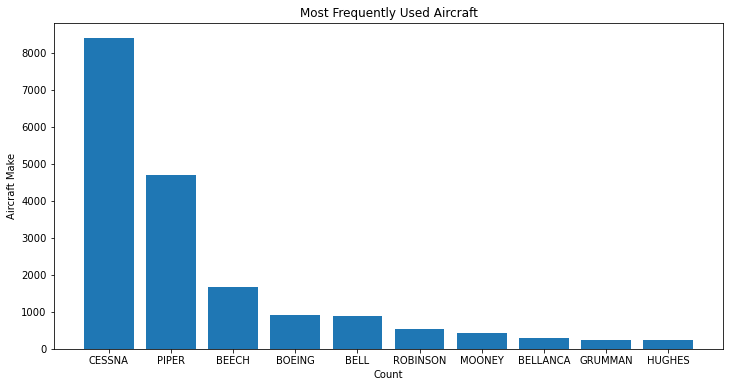

In [47]:
# Finding the most (top 10)preferred aircraft assuming the more the flights the most likely they are to be used
plt.figure(figsize=(12,6))
plt.bar(df['Make'].value_counts().index[:10], df['Make'].value_counts().values[:10])
plt.title('Most Frequently Used Aircraft')
plt.xlabel('Count')
plt.ylabel('Aircraft Make')
plt.show()


#### Which aircraft makes are most involved in accidesnts

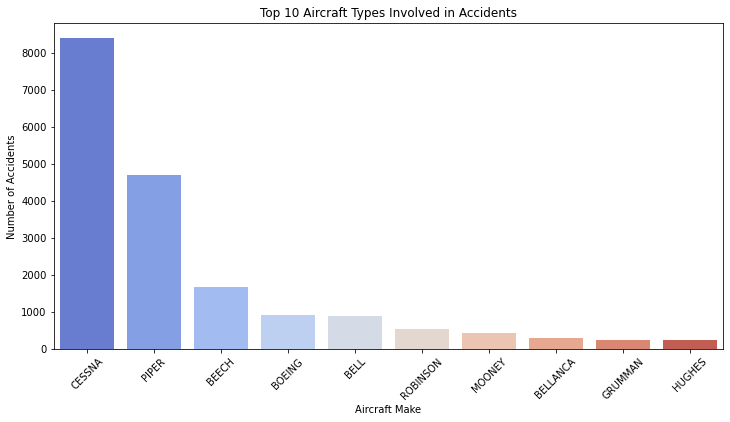

In [24]:
aircraft_counts = df['Make'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=aircraft_counts.index, y=aircraft_counts.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 10 Aircraft Types Involved in Accidents")
plt.xlabel("Aircraft Make")
plt.ylabel("Number of Accidents")
plt.show()


#### Which aircraft make have the highest number of fatal accidents

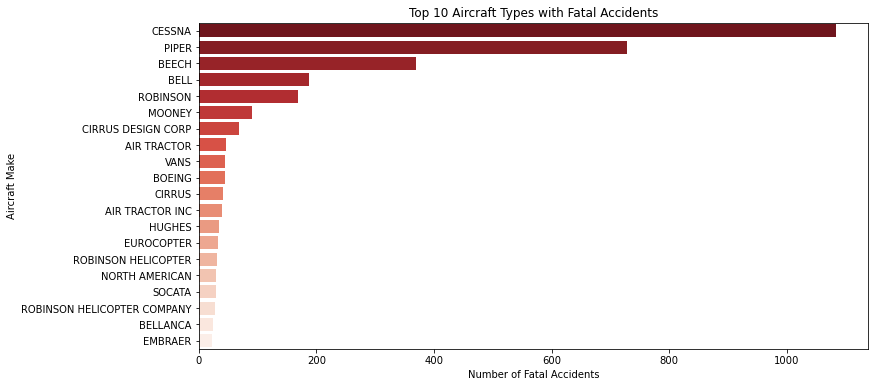

In [25]:
fatal_accidents = df[df['Injury.Severity'] == ("Fatal")]
fatal_counts = fatal_accidents['Make'].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=fatal_counts, y=fatal_counts.index, palette='Reds_r')
plt.title("Top 10 Aircraft Types with Fatal Accidents")
plt.xlabel("Number of Fatal Accidents")
plt.ylabel("Aircraft Make")
plt.show()


#### Plotting accidents happened over time

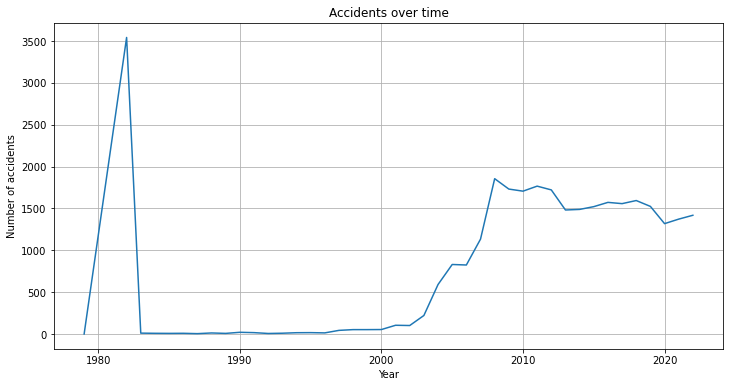

In [26]:
# Extract year from event.date column
df['Year'] = df['Event.Date'].dt.year
# Count number of accidents per year
accidents_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(accidents_per_year.index, accidents_per_year.values)
plt.title('Accidents over time')
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.grid(True)
plt.show()



#### Which flight phase has the highest accident occurences

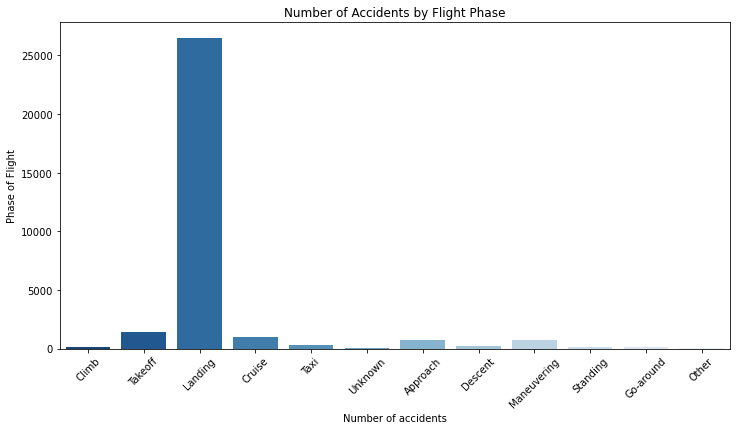

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x= df['Broad.phase.of.flight'], palette='Blues_r')
plt.title('Number of Accidents by Flight Phase')
plt.xlabel('Number of accidents')
plt.xticks(rotation=45)
plt.ylabel('Phase of Flight')
plt.show()

#### Relationship between weather and accidents

- VMC: Good weather conditions where pilots can fly using sual references
- IMC Poor weather conditions where pilots must rely on instruments because visibility low


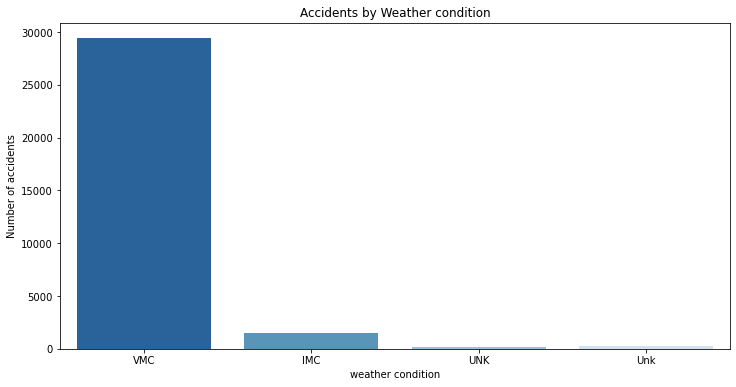

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x= df['Weather.Condition'], palette='Blues_r')
plt.title('Accidents by Weather condition') 
plt.xlabel('weather condition')
plt.ylabel('Number of accidents')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', alpha=0.5)
plt.title('Aviation Accident Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


#### Save cleaned data

In [ ]:
df.to_csv('cleaned_aviation_data.csv', index=False)
